# Importing libraries

In [210]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import re
import html
import dask.dataframe as dd
import ast

# CSVs loading

In [158]:
reviews = pd.read_csv('/Users/danielebelmiro/Data_Analytics_Bootcamp/Rotten/rotten_tomatoes_movie_reviews.csv')

In [159]:
reviews.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [160]:
movies = pd.read_csv('/Users/danielebelmiro/Data_Analytics_Bootcamp/Rotten/rotten_tomatoes_movies.csv')

In [161]:
movies.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [162]:
movies.loc[movies['title'] == "How It Ends"]

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
27564,how_it_ends_2021,How It Ends,42.0,68.0,R,"['Sexual Reference', 'Language Throughout', 'D...",2021-07-20,2021-07-20,82.0,"Comedy, Drama",English,"Zoe Lister Jones,Daryl Wein","Daryl Wein,Zoe Lister Jones",$11.9K,MGM,NaN
99239,how_it_ends,How It Ends,17.0,17.0,NaN,NaN,NaN,2018-07-13,113.0,"Sci-fi, Mystery & thriller, Action, Adventure",English,David M. Rosenthal,Brooks McLaren,NaN,NaN,NaN


# Data cleaning

In [163]:
print(movies.info())
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139041 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23001 non-null   object 
 15  

### Removing duplicates - reviews

In [164]:
reviews.duplicated().sum()

12394

In [165]:
reviews[reviews['reviewId'] == 102699341]

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
983893,it_aint_over_2022,102699341,2022-06-13,Leonard Maltin,True,NaN,fresh,leonardmaltin.com,Yogi Berra lived the kind of life we wish our ...,POSITIVE,https://leonardmaltin.com/i-go-for-yogi-it-ain...
1371660,it_aint_over_2022,102699341,2022-06-13,Leonard Maltin,True,NaN,fresh,leonardmaltin.com,Yogi Berra lived the kind of life we wish our ...,POSITIVE,https://leonardmaltin.com/i-go-for-yogi-it-ain...


In [166]:
reviews = reviews.drop_duplicates().reset_index(drop=True)

In [167]:
reviews.duplicated().sum()

0

Checking to see if there are duplicates in the subset 'reviewId':

In [168]:
reviews[reviews.duplicated(subset=['reviewId'], keep=False)]

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl


### Removing duplicates - movies

In [169]:
movies.duplicated().sum()

1204

In [170]:
movies = movies.drop_duplicates().reset_index(drop=True)

Checking to see if there are duplicates in the subset 'id':

In [171]:
movies[movies.duplicated(subset=['id'], keep=False)]

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
9778,nick_fury_agent_of_shield,Nick Fury: Agent of S.H.I.E.L.D.,16.0,NaN,NaN,NaN,NaN,NaN,96.0,Action,English,Rod Hardy,NaN,NaN,NaN,NaN
10057,nick_fury_agent_of_shield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129053,our_kind_of_traitor_2016,Our Kind of Traitor,50.0,72.0,R,"['Language Throughout', 'Brief Drug Use', 'Nud...",2016-07-01,2016-10-18,108.0,Mystery & thriller,English,Susanna White,Hossein Amini,$3.2M,"Lionsgate Films, Roadside Attractions",Dolby Digital
129439,our_kind_of_traitor_2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
# Removing duplicated lines with more NaN values

movies = movies.drop([10057, 129439], axis=0)

In [173]:
movies[movies.duplicated(subset=['id'], keep=False)]

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix


In [174]:
movies.duplicated().sum()

0

### Dealing with nulls - movies

In [175]:
movies.shape

(142052, 16)

In [176]:
print(movies.isnull().sum())

id                           0
title                      365
audienceScore            69424
tomatoMeter             108478
rating                  128192
ratingContents          128192
releaseDateTheaters     111540
releaseDateStreaming     63322
runtimeMinutes           13715
genre                    10999
originalLanguage         13748
director                  4183
writer                   52685
boxOffice               127436
distributor             119253
soundMix                126265
dtype: int64


Combining release date columns in one new column 'release_year':

In [177]:
# Combine the two columns and fill the new 'release_year' column
movies['release_year'] = movies['releaseDateTheaters'].combine_first(movies['releaseDateStreaming'])

# Convert to datetime and, if possible, extract the year while handling errors
movies['release_year'] = pd.to_datetime(movies['release_year'], errors='coerce').dt.year

# Fill null values with 'Unknown'
movies['release_year'] = movies['release_year'].fillna('Unknown')

# Convert to string without decimal places, only if it's a numeric value
movies['release_year'] = movies['release_year'].apply(lambda x: str(int(x)) if isinstance(x, (int, float)) and x != 'Unknown' else 'Unknown')

# Remove the original columns
movies.drop(columns=['releaseDateTheaters', 'releaseDateStreaming'], inplace=True)

In [178]:
movies.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,release_year
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN,2018
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN,2020
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN,Unknown
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN,2020
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN,2017


Checking movies with null values in title:

In [179]:
movies[movies['title'].isna()]

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,release_year
871,silent_youth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1126,mukkam-post-london,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4038,vortex_2021,NaN,NaN,NaN,NaN,NaN,140.0,Drama,French (France),Gaspar Noé,Gaspar Noé,NaN,Utopia,NaN,2022
5048,the_imported_bridegroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
7364,sands_of_the_desert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135289,nordstrand,NaN,NaN,NaN,NaN,NaN,89.0,Drama,German,Florian Eichinger,Florian Eichinger,NaN,NaN,NaN,Unknown
136031,quarry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greg Chwerchak,NaN,NaN,NaN,NaN,Unknown
136611,freda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
138876,taxi_ballad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


In [180]:
movies['title'].isna().sum()

365

Filling null values in 'title' column based on 'id' column:

In [181]:
movies['id'].isna().sum()

0

In [182]:
movies['title'].fillna(movies['id'].str.replace('_', ' ').str.title(), inplace=True)

In [183]:
movies['title'].isna().sum()

0

In [184]:
movies['title'][7364]

'Sands Of The Desert'

In [185]:
print(movies.isnull().sum())

id                       0
title                    0
audienceScore        69424
tomatoMeter         108478
rating              128192
ratingContents      128192
runtimeMinutes       13715
genre                10999
originalLanguage     13748
director              4183
writer               52685
boxOffice           127436
distributor         119253
soundMix            126265
release_year             0
dtype: int64


Removing columns that are not very relevant and have many null values:

In [186]:
movies.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'rating',
       'ratingContents', 'runtimeMinutes', 'genre', 'originalLanguage',
       'director', 'writer', 'boxOffice', 'distributor', 'soundMix',
       'release_year'],
      dtype='object')

In [187]:
movies.drop(['distributor', 'boxOffice', 'soundMix', 'ratingContents', 'rating'], axis=1, inplace=True)

In [188]:
movies.head()

,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",2018
1,the_green_grass,The Green Grass,NaN,NaN,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,2020
2,love_lies,"Love, Lies",43.0,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown
3,the_sore_losers_1997,Sore Losers,60.0,NaN,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,2020
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,2017


Filling null values in audienceScore and tomatoMeter with the column average:

In [189]:
movies["audienceScore"].fillna(movies["audienceScore"].mean(), inplace=True)
movies["tomatoMeter"].fillna(movies["tomatoMeter"].mean(), inplace=True)

Filling null values in categorical columns with "Unknown":

In [190]:
movies["genre"].fillna("Unknown", inplace=True)

movies["originalLanguage"].fillna("Unknown", inplace=True)

movies["director"].fillna("Unknown", inplace=True)

movies["writer"].fillna("Unknown", inplace=True)


print(movies.isnull().sum())

movies.head()

id                      0
title                   0
audienceScore           0
tomatoMeter             0
runtimeMinutes      13715
genre                   0
originalLanguage        0
director                0
writer                  0
release_year            0
dtype: int64


,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year
0,space-zombie-bingo,Space Zombie Bingo!,50.000000,65.764818,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",2018
1,the_green_grass,The Green Grass,55.669356,65.764818,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,2020
2,love_lies,"Love, Lies",43.000000,65.764818,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown
3,the_sore_losers_1997,Sore Losers,60.000000,65.764818,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,2020
4,dinosaur_island_2002,Dinosaur Island,70.000000,65.764818,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,2017


Filling null movie lenghts with the median by genre. First, we need to split and explode genres into multiple rows:

In [191]:
movies["runtimeMinutes"].dtype

dtype('float64')

In [192]:
# Split genres by comma and explode into multiple rows
movies['genre'] = movies['genre'].str.split(', ')  
movies = movies.explode('genre').reset_index(drop=True)
movies.head()

,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year
0,space-zombie-bingo,Space Zombie Bingo!,50.000000,65.764818,75.0,Comedy,English,George Ormrod,"George Ormrod,John Sabotta",2018
1,space-zombie-bingo,Space Zombie Bingo!,50.000000,65.764818,75.0,Horror,English,George Ormrod,"George Ormrod,John Sabotta",2018
2,space-zombie-bingo,Space Zombie Bingo!,50.000000,65.764818,75.0,Sci-fi,English,George Ormrod,"George Ormrod,John Sabotta",2018
3,the_green_grass,The Green Grass,55.669356,65.764818,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,2020
4,love_lies,"Love, Lies",43.000000,65.764818,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown


In [193]:
movies[movies['runtimeMinutes'].isna()]

,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year
14,kakabakaba-ka-ba,Kakabakaba ka ba? (Will Your Heart Beat Faster?),88.000000,65.764818,NaN,Unknown,Unknown,Mike de Leon,Unknown,Unknown
47,alraune,Alraune (A Daughter of Destiny) (Mandrake) (Un...,57.000000,65.764818,NaN,Unknown,Unknown,Henrik Galeen,Unknown,Unknown
94,father_2018,Father (Hong He Zi),55.669356,65.764818,NaN,Unknown,Unknown,Li-chou Yang,Unknown,Unknown
97,steve-harvey-still-trippin,Steve Harvey: Still Trippin',64.000000,65.764818,NaN,Unknown,Unknown,Leslie Small,Unknown,Unknown
100,angel_guts_nami,Angel Guts Nami,55.669356,65.764818,NaN,Unknown,Unknown,Noboru Tanaka,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...
213474,willoughby,Willoughby,55.669356,65.764818,NaN,Drama,English,"Herbert L. McGurk,Ruben Soto","Herbert L. McGurk,Ruben Soto",Unknown
213475,willoughby,Willoughby,55.669356,65.764818,NaN,Mystery & thriller,English,"Herbert L. McGurk,Ruben Soto","Herbert L. McGurk,Ruben Soto",Unknown
213484,night_of_the_living_bread,Night of the Living Bread,55.669356,65.764818,NaN,Comedy,English,Kevin S. O'Brien,Unknown,Unknown
213485,night_of_the_living_bread,Night of the Living Bread,55.669356,65.764818,NaN,Horror,English,Kevin S. O'Brien,Unknown,Unknown


In [194]:
# Calculate the median by genre
median_by_genre = movies.groupby("genre")["runtimeMinutes"].median()

# Create a temporary DataFrame to store the medians by title and genre
temp_df = movies.copy()
temp_df["genre_median"] = temp_df["genre"].map(median_by_genre)

# Fill the missing values with the corresponding medians
temp_df["runtimeMinutes"].fillna(temp_df["genre_median"], inplace=True)

# Update the original DataFrame
movies["runtimeMinutes"] = temp_df["runtimeMinutes"]

In [195]:
print(median_by_genre)

genre
Action                   96.0
Adventure                91.0
Animation                78.0
Anime                    95.0
Biography                96.0
Comedy                   93.0
Crime                    95.0
Documentary              84.0
Drama                    96.0
Entertainment            64.0
Faith & spirituality     83.0
Fantasy                  91.0
Foreign                  99.5
Gay & lesbian            82.0
Health & wellness        91.5
History                 106.0
Holiday                  90.0
Horror                   90.0
Kids & family            87.0
Lgbtq+                   93.0
Music                    92.0
Musical                  94.0
Mystery & thriller       93.0
Nature                   84.0
News                    153.0
Other                    86.0
Reality                  75.0
Romance                  97.0
Sci-fi                   91.0
Short                    14.5
Special interest         65.0
Sports                   95.0
Sports & fitness         92.0
Stan

In [196]:
movies[movies['runtimeMinutes'].isna()]

,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year


In [197]:
movies['runtimeMinutes'][213474]

96.0

In [198]:
# Group by and calculate the average runtime for each movie
average_runtime = movies.groupby("id")["runtimeMinutes"].transform("mean")
movies["runtimeMinutes"] = average_runtime

In [199]:
movies['runtimeMinutes'][213475]

94.5

In [200]:
movies.isnull().sum()

id                  0
title               0
audienceScore       0
tomatoMeter         0
runtimeMinutes      0
genre               0
originalLanguage    0
director            0
writer              0
release_year        0
dtype: int64

In [201]:
movies.head()

,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year
0,space-zombie-bingo,Space Zombie Bingo!,50.000000,65.764818,75.0,Comedy,English,George Ormrod,"George Ormrod,John Sabotta",2018
1,space-zombie-bingo,Space Zombie Bingo!,50.000000,65.764818,75.0,Horror,English,George Ormrod,"George Ormrod,John Sabotta",2018
2,space-zombie-bingo,Space Zombie Bingo!,50.000000,65.764818,75.0,Sci-fi,English,George Ormrod,"George Ormrod,John Sabotta",2018
3,the_green_grass,The Green Grass,55.669356,65.764818,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,2020
4,love_lies,"Love, Lies",43.000000,65.764818,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown


In [202]:
movies.loc[movies['title'] == "How It Ends"]

,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year
41264,how_it_ends_2021,How It Ends,42.0,68.0,82.0,Comedy,English,"Zoe Lister Jones,Daryl Wein","Daryl Wein,Zoe Lister Jones",2021
41265,how_it_ends_2021,How It Ends,42.0,68.0,82.0,Drama,English,"Zoe Lister Jones,Daryl Wein","Daryl Wein,Zoe Lister Jones",2021
148361,how_it_ends,How It Ends,17.0,17.0,113.0,Sci-fi,English,David M. Rosenthal,Brooks McLaren,2018
148362,how_it_ends,How It Ends,17.0,17.0,113.0,Mystery & thriller,English,David M. Rosenthal,Brooks McLaren,2018
148363,how_it_ends,How It Ends,17.0,17.0,113.0,Action,English,David M. Rosenthal,Brooks McLaren,2018
148364,how_it_ends,How It Ends,17.0,17.0,113.0,Adventure,English,David M. Rosenthal,Brooks McLaren,2018


### Dealing with nulls - reviews

In [203]:
reviews.shape

(1432569, 11)

In [204]:
print(reviews.isnull().sum())

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore     431391
reviewState            0
publicatioName         0
reviewText         68694
scoreSentiment         0
reviewUrl         209139
dtype: int64


Dropping rows with null values in the review text, as the aim of the project is to analyze precisely this variable:

In [205]:
reviews[reviews['reviewText'].isnull()]

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
32,1005521-death_of_a_salesman,1422415,2005-08-04,Jules Brenner,False,4/5,fresh,Cinema Signals,NaN,POSITIVE,NaN
33,1005521-death_of_a_salesman,1409415,2005-07-05,Emanuel Levy,False,3/5,fresh,EmanuelLevy.Com,NaN,POSITIVE,NaN
36,1005521-death_of_a_salesman,751951,2002-08-08,Cory Cheney,False,4/5,fresh,Urban Tulsa Weekly,NaN,POSITIVE,NaN
37,1005521-death_of_a_salesman,743794,2002-07-26,Bob Grimm,False,5/5,fresh,Las Vegas Mercury,NaN,POSITIVE,NaN
39,10002797-sahara,1137710,2003-05-13,Dragan Antulov,False,5/10,fresh,rec.arts.movies.reviews,NaN,POSITIVE,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1429295,phantom_of_the_opera_1925,1195031,2003-09-05,Jovanka Vuckovic,False,5/5,fresh,Rue Morgue Magazine,NaN,POSITIVE,NaN
1429296,phantom_of_the_opera_1925,797719,2002-10-16,Christopher Smith,False,5/5,fresh,Bangor Daily News (Maine),NaN,POSITIVE,NaN
1429297,phantom_of_the_opera_1925,795347,2002-10-11,Jeffrey Westhoff,False,4/5,fresh,"Northwest Herald (Crystal Lake, IL)",NaN,POSITIVE,NaN
1429298,phantom_of_the_opera_1925,757371,2002-08-20,John J. Puccio,False,4/5,fresh,Movie Metropolis,NaN,POSITIVE,NaN


In [206]:
reviews = reviews.dropna(subset=['reviewText'])

Dropping the 'reviewUrl' column because it is not relevant:

In [207]:
reviews.drop(['reviewUrl'], axis=1, inplace=True)

In [208]:
reviews.isnull().sum()

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore     431220
reviewState            0
publicatioName         0
reviewText             0
scoreSentiment         0
dtype: int64

Below, I checked the unique values in 'originalScore' to see if I could normalize then, but finally I decided to drop this column since the values are too diverse and it is not that relevant for the analysis.

In [211]:
# NumPy setup tp show all values in the array
np.set_printoptions(threshold=np.inf)

# Check unique values in Original Score
data = np.array(reviews['originalScore'].unique())
print(data)

['3.5/4' '1/5' nan '2.5/5' '4/5' '7/10' '0.5/4' '3/10' '0/4' '1.5/5' 'B+'
 'C' '8.5/10' '3/5' '3/4' 'B' '9/10' '5/5' '4/4' '3.5/5' '2/5' '5.85/10'
 '1.5/4' '10/10' '2/4' '7.5/10' 'A' '2.5/4' 'B-' '8/10' '1/4' 'C+'
 '3.0/4.0' 'A-' '7.7/10' '7.5' '2.75' 'C-' '3' '4/10' 'F' 'D+' '4.5/5'
 '63/100' '2.5' '6/10' '8.9/10' 'C minus' '90/100' '5/10' '4.0/4.0' '2/10'
 '52/100' '8.01/10' '9.5/10' '5.2/10' '5.5/10' '4.0/5' '4/6' 'D' '6.5/10'
 'B plus' '2.5/5.0' '3.5/5.0' '76/100' '1/10' '0.5/5' 'D-' '3.5/10'
 '2.5/10' '.5/4' '0/10' '0/5' '18/20' '62/100' '3.5/4.0' '4.293382/10'
 '85/100' '87/100' '39/100' 'A+' '3/6' '65/100' '5.65/10' '78/100'
 '88/100' '50/100' '5.8/10' '4' '68/100' '74/100' '7.0/10' '3.5' '3.25/5'
 'FIVE STARS' '2.5/4.0' '2.3/5' 'Recommended' '3.0/5' 'A minus' '8'
 '6.25/10' '8.1/10' '8.0/10' '72/100' '81/100' '8.75/10' '7' '21/100'
 'short' '1.75/4' '2' 'F- - -' 'C -' '1.5 / 4' '2.2 / 5' '4.5/10' '1.5'
 '7.5/20' '12/20' '2.0/4.0' '1.5/4.0' '3 out 5' '9.2/10' '.5/5' '3.5 / 5'
 '

In [212]:
reviews.drop(['originalScore'], axis=1, inplace=True)

In [213]:
reviews.isnull().sum()

id                0
reviewId          0
creationDate      0
criticName        0
isTopCritic       0
reviewState       0
publicatioName    0
reviewText        0
scoreSentiment    0
dtype: int64

In [214]:
reviews.head()

,id,reviewId,creationDate,criticName,isTopCritic,reviewState,publicatioName,reviewText,scoreSentiment
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE
1,blood_mask,1636744,2007-06-02,The Foywonder,False,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE


### Adding 'title' column to the reviews df

Create df with unique movies (without duplicates) to then merge it with reviews:

In [215]:
unique_movies = movies.drop_duplicates(subset='id')
reviews = reviews.merge(unique_movies[['id', 'title']], on='id', how='left')

Reorder columns so that 'title' is next to 'id':

In [216]:
cols = reviews.columns.tolist()  
cols.insert(cols.index('id') + 1, cols.pop(cols.index('title'))) 
reviews = reviews[cols] 

In [217]:
reviews.shape

(1363875, 10)

In [218]:
reviews.head()

,id,title,reviewId,creationDate,criticName,isTopCritic,reviewState,publicatioName,reviewText,scoreSentiment
0,beavers,Beavers,1145982,2003-05-23,Ivan M. Lincoln,False,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE
1,blood_mask,Blood Mask,1636744,2007-06-02,The Foywonder,False,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,city_hunter_shinjuku_private_eyes,City Hunter: Shinjuku Private Eyes,2590987,2019-05-28,Reuben Baron,False,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE
3,city_hunter_shinjuku_private_eyes,City Hunter: Shinjuku Private Eyes,2558908,2019-02-14,Matt Schley,False,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,dangerous_men_2015,Dangerous Men,2504681,2018-08-29,Pat Padua,False,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE


In [219]:
print(reviews.isnull().sum())

id                  0
title             296
reviewId            0
creationDate        0
criticName          0
isTopCritic         0
reviewState         0
publicatioName      0
reviewText          0
scoreSentiment      0
dtype: int64


Checking null values that appeared in the 'title' column after the merge (and finally removing them):

In [220]:
x = reviews[reviews['title'].isna()]

In [221]:
x

,id,title,reviewId,creationDate,criticName,isTopCritic,reviewState,publicatioName,reviewText,scoreSentiment
951525,0814255,NaN,102744359,2022-10-19,Rene Jordan,False,fresh,El Nuevo Herald (Miami),The Lightning Thief is good juvenile entertain...,POSITIVE
951526,0814255,NaN,2746517,2020-11-30,Mike Massie,False,rotten,Gone With The Twins,"For every creative aspect, there is a contrive...",NEGATIVE
951527,0814255,NaN,2726666,2020-09-19,Richard Propes,False,rotten,TheIndependentCritic.com,There's nothing resembling a spark in this fil...,NEGATIVE
951528,0814255,NaN,2699162,2020-06-26,Leigh Paatsch,False,rotten,Herald Sun (Australia),"OK, but only just.",NEGATIVE
951529,0814255,NaN,2662754,2020-01-23,Felicia Feaster,False,fresh,Charleston City Paper,The Lightning Thief is an admirable kid's fant...,POSITIVE
...,...,...,...,...,...,...,...,...,...,...
1272351,fight_church,NaN,2223967,2014-09-19,Bill Gibron,False,fresh,EntertainmentTell,... the faces behind the faith-based fisticuff...,POSITIVE
1272352,fight_church,NaN,2222948,2014-09-15,Dan Schindel,False,fresh,Nonfics,Fight Church is an interesting look at Christi...,POSITIVE
1272353,fight_church,NaN,2222947,2014-09-15,Kevin Jagernauth,False,fresh,The Playlist,"Storkel and Junge largely get it right, taking...",POSITIVE
1272354,fight_church,NaN,2222945,2014-09-15,Mark Bell,False,fresh,Film Threat,A surprisingly nuanced and intriguing study of...,POSITIVE


In [222]:
x['id'].unique()

array(['0814255', '0878835', 'fight_church'], dtype=object)

In [223]:
x[x['id'] == '0814255']

,id,title,reviewId,creationDate,criticName,isTopCritic,reviewState,publicatioName,reviewText,scoreSentiment
951525,0814255,NaN,102744359,2022-10-19,Rene Jordan,False,fresh,El Nuevo Herald (Miami),The Lightning Thief is good juvenile entertain...,POSITIVE
951526,0814255,NaN,2746517,2020-11-30,Mike Massie,False,rotten,Gone With The Twins,"For every creative aspect, there is a contrive...",NEGATIVE
951527,0814255,NaN,2726666,2020-09-19,Richard Propes,False,rotten,TheIndependentCritic.com,There's nothing resembling a spark in this fil...,NEGATIVE
951528,0814255,NaN,2699162,2020-06-26,Leigh Paatsch,False,rotten,Herald Sun (Australia),"OK, but only just.",NEGATIVE
951529,0814255,NaN,2662754,2020-01-23,Felicia Feaster,False,fresh,Charleston City Paper,The Lightning Thief is an admirable kid's fant...,POSITIVE
...,...,...,...,...,...,...,...,...,...,...
951668,0814255,NaN,1870212,2010-02-10,Roger Moore,True,rotten,Orlando Sentinel,"For what it is and for whom it is intended, it...",NEGATIVE
951669,0814255,NaN,1870187,2010-02-10,David Jenkins,True,rotten,Time Out,Chris Columbus returns to his comfort zone for...,NEGATIVE
951670,0814255,NaN,1870158,2010-02-09,Ben McEachen,False,fresh,Sunday Mail (Australia),Whether audiences will get behind The Lightnin...,POSITIVE
951671,0814255,NaN,1869889,2010-02-06,Andrew L. Urban,False,fresh,Urban Cinefile,A fantasy adventure that fuses Greek mythology...,POSITIVE


In [224]:
movies[movies['id'] == '0814255']

,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year


In [225]:
reviews = reviews.dropna(subset=['title'])

In [226]:
reviews.isnull().sum()

id                0
title             0
reviewId          0
creationDate      0
criticName        0
isTopCritic       0
reviewState       0
publicatioName    0
reviewText        0
scoreSentiment    0
dtype: int64

### Checking movies with no reviews and removing then from the movies df

In [227]:
num_unique_titles = reviews["title"].nunique()
num_unique_titles

62199

In [228]:
num_unique_titles2 = movies["title"].nunique()
num_unique_titles2

126752

Filtering movies df to keep only the ones with reviews:

In [229]:
movies_with_reviews = reviews["id"].unique()

filtered_movies = movies[movies["id"].isin(movies_with_reviews)]

filtered_movies

,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year
4,love_lies,"Love, Lies",43.000000,65.764818,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown
10,adrift_2018,Adrift,65.000000,69.000000,120.0,Adventure,English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",2018
11,adrift_2018,Adrift,65.000000,69.000000,120.0,Drama,English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",2018
12,adrift_2018,Adrift,65.000000,69.000000,120.0,Romance,English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",2018
16,1035316-born_to_kill,Born to Kill,74.000000,83.000000,92.0,Crime,English,Robert Wise,"Eve Greene,Richard Macaulay",1947
...,...,...,...,...,...,...,...,...,...,...
213491,fun_size,Fun Size,47.000000,25.000000,86.0,Holiday,English,Josh Schwartz,Max Werner,2012
213492,fun_size,Fun Size,47.000000,25.000000,86.0,Comedy,English,Josh Schwartz,Max Werner,2012
213494,dassehra,Dassehra,55.669356,65.764818,131.0,Action,Hindi,Manish Vatsalya,Saurabh Choudhary,2019
213495,dassehra,Dassehra,55.669356,65.764818,131.0,Mystery & thriller,Hindi,Manish Vatsalya,Saurabh Choudhary,2019


In [230]:
filtered_movies["title"].nunique()

62199

In [231]:
filtered_movies["id"].nunique()

67604

In [232]:
filtered_movies.shape

(105660, 10)

In [233]:
movies = filtered_movies

In [234]:
movies["title"].nunique()

62199

### Checking if unique values need normalization - movies

In [236]:
movies.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'writer', 'release_year'],
      dtype='object')

#### Original Language:

In [237]:
movies['originalLanguage'].unique()

array(['Korean', 'English', 'Hindi', 'Unknown', 'Japanese', 'Spanish',
       'English (United Kingdom)', 'Afrikaans', 'Italian', 'Tagalog',
       'French (France)', 'Dutch', 'Swedish', 'Spanish (Spain)', 'German',
       'Arabic', 'Vietnamese', 'English (Australia)', 'Tamil',
       'Bulgarian', 'French (Canada)', 'Bangla', 'Portuguese (Brazil)',
       'Czech', 'French', 'Telugu', 'Hebrew', 'Navajo', 'Malayalam',
       'Urdu', 'Ukrainian', 'Russian', 'Icelandic', 'Chinese', 'Serbian',
       'Malay', 'Polish', 'Persian', 'Portuguese', 'Hungarian', 'Latin',
       'Filipino', 'Danish', 'Greek', 'Turkish', 'Hmong',
       'Unknown language', 'Finnish', 'Thai', 'Norwegian', 'Croatian',
       'Bosnian', 'Amharic', 'Inuktitut', 'Marathi', 'Punjabi',
       'Estonian', 'Georgian', 'Macedonian', 'Swahili', 'Yiddish',
       'Dzongkha', 'Scottish Gaelic', 'Romany', 'Romanian', 'Bambara',
       'Kannada', 'Albanian', 'Indonesian', 'Tibetan', 'Slovak', 'Khmer',
       'Kyrgyz', 'Pashto', '

In [238]:
movies['originalLanguage'].nunique()

110

In [239]:
# Create a dictionary for mapping original languages to standardized names
language_mapping = {
    'Korean': 'Korean',
    'English': 'English',
    'Hindi': 'Hindi',
    'French (France)': 'French',
    'Unknown': 'Unknown',
    'Japanese': 'Japanese',
    'Spanish': 'Spanish',
    'English (United Kingdom)': 'English',
    'Afrikaans': 'Afrikaans',
    'Italian': 'Italian',
    'Tagalog': 'Tagalog',
    'Dutch': 'Dutch',
    'Swedish': 'Swedish',
    'Spanish (Spain)': 'Spanish',
    'German': 'German',
    'Chinese': 'Chinese',
    'Arabic': 'Arabic',
    'Vietnamese': 'Vietnamese',
    'English (Australia)': 'English',
    'Tamil': 'Tamil',
    'Russian': 'Russian',
    'Bulgarian': 'Bulgarian',
    'Polish': 'Polish',
    'French (Canada)': 'French',
    'Bangla': 'Bangla',
    'Portuguese (Brazil)': 'Portuguese',
    'Czech': 'Czech',
    'French': 'French',
    'Telugu': 'Telugu',
    'Hebrew': 'Hebrew',
    'Navajo': 'Navajo',
    'Malayalam': 'Malayalam',
    'Urdu': 'Urdu',
    'Ukrainian': 'Ukrainian',
    'Icelandic': 'Icelandic',
    'Serbian': 'Serbian',
    'Malay': 'Malay',
    'Persian': 'Persian',
    'Macedonian': 'Macedonian',
    'Portuguese': 'Portuguese',
    'Hungarian': 'Hungarian',
    'Latin': 'Latin',
    'Filipino': 'Filipino',
    'Estonian': 'Estonian',
    'Danish': 'Danish',
    'Greek': 'Greek',
    'Turkish': 'Turkish',
    'Hmong': 'Hmong',
    'Unknown language': 'Unknown',
    'Finnish': 'Finnish',
    'Thai': 'Thai',
    'Norwegian': 'Norwegian',
    'Croatian': 'Croatian',
    'Bosnian': 'Bosnian',
    'Amharic': 'Amharic',
    'Inuktitut': 'Inuktitut',
    'Marathi': 'Marathi',
    'Punjabi': 'Punjabi',
    'Yiddish': 'Yiddish',
    'Georgian': 'Georgian',
    'Swahili': 'Swahili',
    'Dzongkha': 'Dzongkha',
    'Scottish Gaelic': 'Scottish Gaelic',
    'Romany': 'Romany',
    'Romanian': 'Romanian',
    'Bambara': 'Bambara',
    'Kannada': 'Kannada',
    'Albanian': 'Albanian',
    'Indonesian': 'Indonesian',
    'Tibetan': 'Tibetan',
    'Slovak': 'Slovak',
    'Khmer': 'Khmer',
    'Kyrgyz': 'Kyrgyz',
    'Gujarati': 'Gujarati',
    'Pashto': 'Pashto',
    'Slovenian': 'Slovenian',
    'Mongolian': 'Mongolian',
    'Lithuanian': 'Lithuanian',
    'Latvian': 'Latvian',
    'Sinhala': 'Sinhala',
    'Belarusian': 'Belarusian',
    'Welsh': 'Welsh',
    'Zulu': 'Zulu',
    'Azerbaijani': 'Azerbaijani',
    'Luxembourgish': 'Luxembourgish',
    'Maori': 'Maori',
    'Nepali': 'Nepali',
    'Catalan': 'Catalan',
    'Kurdish': 'Kurdish',
    'Somali': 'Somali',
    'Armenian': 'Armenian',
    'Faroese': 'Faroese',
    'Irish': 'Irish',
    'Wolof': 'Wolof',
    'Maltese': 'Maltese',
    'crp': 'creole',
    'Basque': 'Basque',
    'Lingala': 'Lingala',
    'Lao': 'Lao',
    'Galician': 'Galician',
    'nah': 'Nahuatl',
    'Cree': 'Cree',
    'Samoan': 'Samoan',
    'Xhosa': 'Xhosa',
    'Kalaallisut': 'Kalaallisut',
    'smi': 'Sami',
    'Aramaic': 'Aramaic',
    'Tajik': 'Tajik',
    'Malagasy': 'Malagasy',
    'shg': 'Shughni'
}

# Apply the mapping to the DataFrame
movies['originalLanguage'] = movies['originalLanguage'].map(language_mapping)
movies

,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year
4,love_lies,"Love, Lies",43.000000,65.764818,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown
10,adrift_2018,Adrift,65.000000,69.000000,120.0,Adventure,English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",2018
11,adrift_2018,Adrift,65.000000,69.000000,120.0,Drama,English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",2018
12,adrift_2018,Adrift,65.000000,69.000000,120.0,Romance,English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",2018
16,1035316-born_to_kill,Born to Kill,74.000000,83.000000,92.0,Crime,English,Robert Wise,"Eve Greene,Richard Macaulay",1947
...,...,...,...,...,...,...,...,...,...,...
213491,fun_size,Fun Size,47.000000,25.000000,86.0,Holiday,English,Josh Schwartz,Max Werner,2012
213492,fun_size,Fun Size,47.000000,25.000000,86.0,Comedy,English,Josh Schwartz,Max Werner,2012
213494,dassehra,Dassehra,55.669356,65.764818,131.0,Action,Hindi,Manish Vatsalya,Saurabh Choudhary,2019
213495,dassehra,Dassehra,55.669356,65.764818,131.0,Mystery & thriller,Hindi,Manish Vatsalya,Saurabh Choudhary,2019


In [240]:
movies['originalLanguage'].nunique()

103

In [241]:
movies['originalLanguage'].value_counts()

originalLanguage
English       72831
Unknown        7529
French         4259
Spanish        3160
Hindi          2550
              ...  
Belarusian        1
Sami              1
Navajo            1
Nahuatl           1
Shughni           1
Name: count, Length: 103, dtype: int64

In [242]:
language_counts = movies['originalLanguage'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']
language_counts

,Language,Count
0,English,72831
1,Unknown,7529
2,French,4259
3,Spanish,3160
4,Hindi,2550
...,...,...
98,Belarusian,1
99,Sami,1
100,Navajo,1
101,Nahuatl,1


#### Director — since one title can have more than one director, let's extract and count them:

In [243]:
# Replace "Unknown Director" with "Unknown"
movies['director'] = movies['director'].str.replace('Unknown Director', 'Unknown')

In [244]:
len(movies['director'].unique())

32361

In [245]:
# Split the directors and count the frequency  
directors_list = movies['director'].str.split(',').explode()

# Count the frequency of each director  
director_counts = directors_list.value_counts()

print(director_counts)

director
Unknown            2556
Takashi Miike       105
Michael Curtiz       96
John Ford            84
Jules Bass           83
                   ... 
Nicolas Charlet       1
Jack Woods            1
Lynne Tillman         1
Emre Yeksan           1
Peter Georgi          1
Name: count, Length: 33911, dtype: int64


In [246]:
len(director_counts)

33911

#### Writer — since one title can have more than one writer, let's extract and count them:

In [247]:
movies['writer'].value_counts()

writer
Unknown                                    27063
Woody Allen                                   61
Tyler Perry                                   42
Ingmar Bergman                                41
Romeo Muller                                  39
                                           ...  
Paul Taublieb                                  1
Andrea Bussmann                                1
David Assael,Dale Rosenbloom,Sandy Tung        1
Ken Levison,Greg Morrison                      1
Richard Dale                                   1
Name: count, Length: 36266, dtype: int64

In [248]:
len(movies['writer'].unique())

36266

In [249]:
# Split the writer and count the frequency  
writers_list = movies['writer'].str.split(',').explode()

# Count the frequency of each writer  
writer_counts = writers_list.value_counts()

print(writer_counts)

writer
Unknown                  27063
                           148
Luc Besson                 106
Woody Allen                 71
Mark Monroe                 62
                         ...  
Leila Djansi                 1
Surya Kumar Upadhayay        1
David Latham                 1
Lisa Bernard                 1
Richard Dale                 1
Name: count, Length: 41659, dtype: int64


In [250]:
len(writer_counts)

41659

#### Release Year:

In [251]:
movies['release_year'].unique()

array(['Unknown', '2018', '1947', '2016', '2002', '2020', '2009', '2011',
       '1999', '2005', '2013', '2017', '1963', '2021', '1996', '2012',
       '2022', '1991', '2006', '2015', '1993', '2001', '2019', '1970',
       '2014', '2004', '1998', '1919', '1939', '2008', '1957', '2003',
       '1971', '1950', '1974', '1964', '1972', '1990', '1941', '2007',
       '1944', '1994', '1977', '1929', '1943', '1961', '1949', '1956',
       '1976', '1959', '1958', '1951', '2023', '2010', '1960', '1934',
       '1997', '1988', '1940', '1967', '1942', '1952', '1995', '1973',
       '1948', '1981', '1927', '1938', '1965', '1987', '1978', '1928',
       '2000', '1931', '1985', '1986', '1980', '1937', '1916', '1953',
       '1962', '1936', '1982', '1966', '1932', '1946', '1945', '1921',
       '1935', '1992', '1955', '1984', '1989', '1925', '1954', '1924',
       '1983', '1909', '1923', '1968', '1922', '1969', '1979', '1975',
       '1933', '1920', '1930', '1902', '1917', '1926', '1915', '1914',
   

#### Genre:

In [252]:
movies['genre'].unique()

array(['Drama', 'Adventure', 'Romance', 'Crime', 'Mystery & thriller',
       'Documentary', 'Comedy', 'Action', 'Unknown', 'Biography', 'Music',
       'History', 'Horror', 'Kids & family', 'Sci-fi', 'Fantasy',
       'Stand-up', 'Lgbtq+', 'Anime', 'Western', 'Musical', 'Animation',
       'Holiday', 'War', 'Gay & lesbian', 'Sports & fitness', 'Sports',
       'Foreign', 'Variety', 'Nature', 'Faith & spirituality',
       'Health & wellness', 'Short', 'Reality', 'Special interest',
       'Entertainment', 'News', 'Other'], dtype=object)

In [253]:
# Create a dictionary to map genres
genre_mapping = {
    'Drama': 'Drama',
    'Fantasy': 'Fantasy',
    'Adventure': 'Adventure',
    'Animation': 'Animation',
    'Romance': 'Romance',
    'Crime': 'Crime',
    'Mystery & thriller': 'Thriller',
    'Documentary': 'Documentary',
    'Comedy': 'Comedy',
    'Action': 'Action',
    'Holiday': 'Holiday',
    'Unknown': 'Unknown',
    'Biography': 'Biography',
    'Music': 'Music',
    'Horror': 'Horror',
    'History': 'History',
    'War': 'War',
    'Kids & family': 'Family',
    'Western': 'Western',
    'Sci-fi': 'Sci-fi',
    'Stand-up': 'Comedy',
    'Lgbtq+': 'LGBTQ+',
    'Anime': 'Animation',
    'Musical': 'Musical',
    'Gay & lesbian': 'LGBTQ+',
    'Sports & fitness': 'Sports',
    'Sports': 'Sports',
    'Foreign': 'Foreign',
    'Variety': 'Entertainment',
    'Nature': 'Documentary',
    'Faith & spirituality': 'Religion',
    'Health & wellness': 'Health',
    'Short': 'Short',
    'Reality': 'Reality',
    'Other': 'Other',
    'Special interest': 'Special Interest',
    'Entertainment': 'Entertainment',
    'News': 'News'
}

# Apply the mapping to the DataFrame
movies['genre'] = movies['genre'].map(genre_mapping)

In [254]:
movies['genre'].value_counts()

genre
Drama               26511
Comedy              15151
Documentary          9328
Thriller             8957
Unknown              5934
Horror               5674
Romance              4710
Action               4586
Adventure            3664
Crime                3144
Fantasy              2343
Sci-fi               2291
Family               2058
Animation            1828
Biography            1824
History              1406
Musical              1301
Western              1186
LGBTQ+               1068
War                   986
Music                 834
Holiday               702
Foreign                73
Sports                 70
Short                   9
Entertainment           6
Special Interest        4
Other                   4
Religion                3
Health                  3
Reality                 1
News                    1
Name: count, dtype: int64

In [255]:
# Convert it into a df for better visualization
genre_counts = movies['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts

,Genre,Count
0,Drama,26511
1,Comedy,15151
2,Documentary,9328
3,Thriller,8957
4,Unknown,5934
5,Horror,5674
6,Romance,4710
7,Action,4586
8,Adventure,3664
9,Crime,3144


#### Round audience score and tomatometer:

In [256]:
movies['audienceScore'] = movies['audienceScore'].round(2)
movies['tomatoMeter'] = movies['tomatoMeter'].round(2)

In [257]:
movies.head()

,id,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer,release_year
4,love_lies,"Love, Lies",43.0,65.76,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown
10,adrift_2018,Adrift,65.0,69.00,120.0,Adventure,English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",2018
11,adrift_2018,Adrift,65.0,69.00,120.0,Drama,English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",2018
12,adrift_2018,Adrift,65.0,69.00,120.0,Romance,English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",2018
16,1035316-born_to_kill,Born to Kill,74.0,83.00,92.0,Crime,English,Robert Wise,"Eve Greene,Richard Macaulay",1947


### Checking if unique values need normalization - reviews

In [258]:
reviews.head()

,id,title,reviewId,creationDate,criticName,isTopCritic,reviewState,publicatioName,reviewText,scoreSentiment
0,beavers,Beavers,1145982,2003-05-23,Ivan M. Lincoln,False,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE
1,blood_mask,Blood Mask,1636744,2007-06-02,The Foywonder,False,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,city_hunter_shinjuku_private_eyes,City Hunter: Shinjuku Private Eyes,2590987,2019-05-28,Reuben Baron,False,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE
3,city_hunter_shinjuku_private_eyes,City Hunter: Shinjuku Private Eyes,2558908,2019-02-14,Matt Schley,False,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,dangerous_men_2015,Dangerous Men,2504681,2018-08-29,Pat Padua,False,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE


In [259]:
reviews.columns

Index(['id', 'title', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'reviewState', 'publicatioName', 'reviewText', 'scoreSentiment'],
      dtype='object')

In [260]:
reviews['creationDate'].nunique()

8395

In [261]:
reviews['criticName'].nunique()

15477

In [262]:
reviews['isTopCritic'].unique()

array([False,  True])

In [263]:
reviews['reviewState'].unique()

array(['fresh', 'rotten'], dtype=object)

In [264]:
reviews['publicatioName'][reviews['publicatioName'].str.contains('Unknown', case=False, na=False)].unique()

array(['Unknown2'], dtype=object)

In [265]:
reviews['publicatioName'].value_counts()

publicatioName
New York Times                     19464
Variety                            17410
Los Angeles Times                  14220
Hollywood Reporter                 13583
Dennis Schwartz Movie Reviews      13019
                                   ...  
diaCRITICS                             1
Home Media Magazine                    1
So You Wanna Sell A Script             1
Plugged In                             1
Lake Highlands Advocate (Texas)        1
Name: count, Length: 2707, dtype: int64

In [266]:
reviews['scoreSentiment'].unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [267]:
reviews.head()

,id,title,reviewId,creationDate,criticName,isTopCritic,reviewState,publicatioName,reviewText,scoreSentiment
0,beavers,Beavers,1145982,2003-05-23,Ivan M. Lincoln,False,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE
1,blood_mask,Blood Mask,1636744,2007-06-02,The Foywonder,False,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,city_hunter_shinjuku_private_eyes,City Hunter: Shinjuku Private Eyes,2590987,2019-05-28,Reuben Baron,False,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE
3,city_hunter_shinjuku_private_eyes,City Hunter: Shinjuku Private Eyes,2558908,2019-02-14,Matt Schley,False,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,dangerous_men_2015,Dangerous Men,2504681,2018-08-29,Pat Padua,False,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE


### Cleaning review texts

In [268]:
def clean_text(text):
    # Convert HTML entities to corresponding characters
    text = html.unescape(text)
    
    # Remove special characters (keep only letters, numbers, and spaces)
    text = re.sub(r'[^A-Za-z0-9áéíóúãõãàâêô\s]', '', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    # Remove spaces at the beginning and end
    text = text.strip()
    
    return text

# Apply the clean_text function to all values in the 'reviewText' column
reviews['cleanedReviewText'] = reviews['reviewText'].apply(clean_text)

# Display the first few rows to check the result
print(reviews[['reviewText', 'cleanedReviewText']].head())

                                          reviewText  \
0  Timed to be just long enough for most youngste...   
1  It doesn't matter if a movie costs 300 million...   
2  The choreography is so precise and lifelike at...   
3  The film's out-of-touch attempts at humor may ...   
4  Its clumsy determination is endearing and some...   

                                   cleanedReviewText  
0  Timed to be just long enough for most youngste...  
1  It doesnt matter if a movie costs 300 million ...  
2  The choreography is so precise and lifelike at...  
3  The films outoftouch attempts at humor may fin...  
4  Its clumsy determination is endearing and some...  


In [269]:
reviews.loc[1363874]

id                                               thor_love_and_thunder
title                                           Thor: Love and Thunder
reviewId                                                     102706147
creationDate                                                2022-07-05
criticName                                                 Roger Moore
isTopCritic                                                      False
reviewState                                                      fresh
publicatioName                                            Movie Nation
reviewText           It&#8217;s the jokes that make it&#44; with th...
scoreSentiment                                                POSITIVE
cleanedReviewText    Its the jokes that make it with the selfmockin...
Name: 1363874, dtype: object

### Exporting clean dfs

In [270]:
reviews.to_csv('clean_reviews.csv', index=False)
movies.to_csv('clean_movies.csv', index=False)

# EDA

In [293]:
reviews_emotions = pd.read_csv('/Users/danielebelmiro/Data_Analytics_Bootcamp/Rotten/reviews_emotions.csv')
movies_final = pd.read_csv('/Users/danielebelmiro/Data_Analytics_Bootcamp/Rotten/movies_final.csv')

In [294]:
movies_final.head()

,id,title,audienceScore,tomatoMeter,runtimeMinutes,originalLanguage,director,writer,release_year,genre,emotions,title_normalized,count
0,my_missing_valentine,消失的情人節,55.67,65.76,119.0,Chinese,Yu-Hsun Chen,"Yu-Hsun Chen,Yu-Hsun Chen",Unknown,"['Comedy', 'Drama', 'Fantasy', 'Foreign', 'Rom...","[('admiration', 52.16256606223262), ('exciteme...",NaN,3
1,00_mhz,0.0 MHz,33.00,65.76,101.0,Korean,Yoo Sun-Dong,Jang Jak,2020,['Horror'],"[('annoyance', 41.840924718059824), ('admirati...",00 mhz,3
2,009_re_cyborg,009 Re: Cyborg,43.00,23.00,103.0,Japanese,Kenji Kamiyama,Kenji Kamiyama,2015,"['Action', 'Sci-fi', 'Animation']","[('disapproval', 36.023279538211014), ('annoya...",009 re cyborg,13
3,45,0.45,38.00,65.76,101.0,English,Gary Lennon,Gary Lennon,2020,"['Crime', 'Drama', 'Thriller']","[('annoyance', 80.9424), ('anger', 14.1899), (...",045,1
4,1_2017,1%,82.00,47.00,88.0,Unknown,Stephen McCallum,Unknown,Unknown,['Unknown'],"[('admiration', 40.5276835242493), ('disappoin...",1,17


In [295]:
reviews_emotions.head()

,id,title,reviewId,creationDate,criticName,isTopCritic,reviewState,publicatioName,reviewText,scoreSentiment,cleanedReviewText,predicted_moods
0,beavers,Beavers,1145982,2003-05-23,Ivan M. Lincoln,False,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,Timed to be just long enough for most youngste...,"[('excitement', 35.543839830098335), ('approva..."
1,blood_mask,Blood Mask,1636744,2007-06-02,The Foywonder,False,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,It doesnt matter if a movie costs 300 million ...,"[('disapproval', 56.05641547237329), ('annoyan..."
2,city_hunter_shinjuku_private_eyes,City Hunter: Shinjuku Private Eyes,2590987,2019-05-28,Reuben Baron,False,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,The choreography is so precise and lifelike at...,"[('admiration', 80.08288365216127), ('approval..."
3,city_hunter_shinjuku_private_eyes,City Hunter: Shinjuku Private Eyes,2558908,2019-02-14,Matt Schley,False,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,The films outoftouch attempts at humor may fin...,"[('amusement', 22.690977576957067), ('realizat..."
4,dangerous_men_2015,Dangerous Men,2504681,2018-08-29,Pat Padua,False,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,Its clumsy determination is endearing and some...,"[('amusement', 49.197768434566136), ('admirati..."


In [296]:
reviews_emotions.columns

Index(['id', 'title', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'reviewState', 'publicatioName', 'reviewText', 'scoreSentiment',
       'cleanedReviewText', 'predicted_moods'],
      dtype='object')

In [297]:
movies_final.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'runtimeMinutes',
       'originalLanguage', 'director', 'writer', 'release_year', 'genre',
       'emotions', 'title_normalized', 'count'],
      dtype='object')

In [298]:
print(movies_final['emotions'].dtype)
print(reviews_emotions['predicted_moods'].dtype)

object
object


In [302]:
print(type(movies_final['genre'][0]))
print(type(reviews_emotions['predicted_moods'][0]))

<class 'str'>
<class 'list'>


In [300]:
# Converting 'emotions' into a list
movies_final['emotions'] = movies_final['emotions'].apply(ast.literal_eval)

# Converting 'predicted_moods' into a list
reviews_emotions['predicted_moods'] = reviews_emotions['predicted_moods'].apply(ast.literal_eval)

In [301]:
# Generate dominant emotion per movie
movies_final['dominant_emotion'] = movies_final['emotions'].apply(lambda moods: max(moods, key=lambda x: x[1])[0])

# Generate dominant emotion per review
reviews_emotions['dominant_emotion'] = reviews_emotions['predicted_moods'].apply(lambda moods: max(moods, key=lambda x: x[1])[0])

### Visualization

#### Distribution of Movie Genres (Bar chart)

In [303]:
# Function to safely convert strings to lists
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)  # Convert the string to a list
    except (ValueError, SyntaxError):
        return []  # Return an empty list if conversion fails

# Apply the function to the 'genre' column
movies_final['genre'] = movies_final['genre'].apply(safe_literal_eval)

# Explode the 'genre' column so each genre becomes a separate row
movies_exploded = movies_final.explode('genre')

# Display the first few rows of the resulting DataFrame
print(movies_exploded.head())

                     id   title  audienceScore  tomatoMeter  runtimeMinutes  \
0  my_missing_valentine  消失的情人節          55.67        65.76           119.0   
0  my_missing_valentine  消失的情人節          55.67        65.76           119.0   
0  my_missing_valentine  消失的情人節          55.67        65.76           119.0   
0  my_missing_valentine  消失的情人節          55.67        65.76           119.0   
0  my_missing_valentine  消失的情人節          55.67        65.76           119.0   

  originalLanguage      director                     writer release_year  \
0          Chinese  Yu-Hsun Chen  Yu-Hsun Chen,Yu-Hsun Chen      Unknown   
0          Chinese  Yu-Hsun Chen  Yu-Hsun Chen,Yu-Hsun Chen      Unknown   
0          Chinese  Yu-Hsun Chen  Yu-Hsun Chen,Yu-Hsun Chen      Unknown   
0          Chinese  Yu-Hsun Chen  Yu-Hsun Chen,Yu-Hsun Chen      Unknown   
0          Chinese  Yu-Hsun Chen  Yu-Hsun Chen,Yu-Hsun Chen      Unknown   

     genre                                           emotions  \
0  

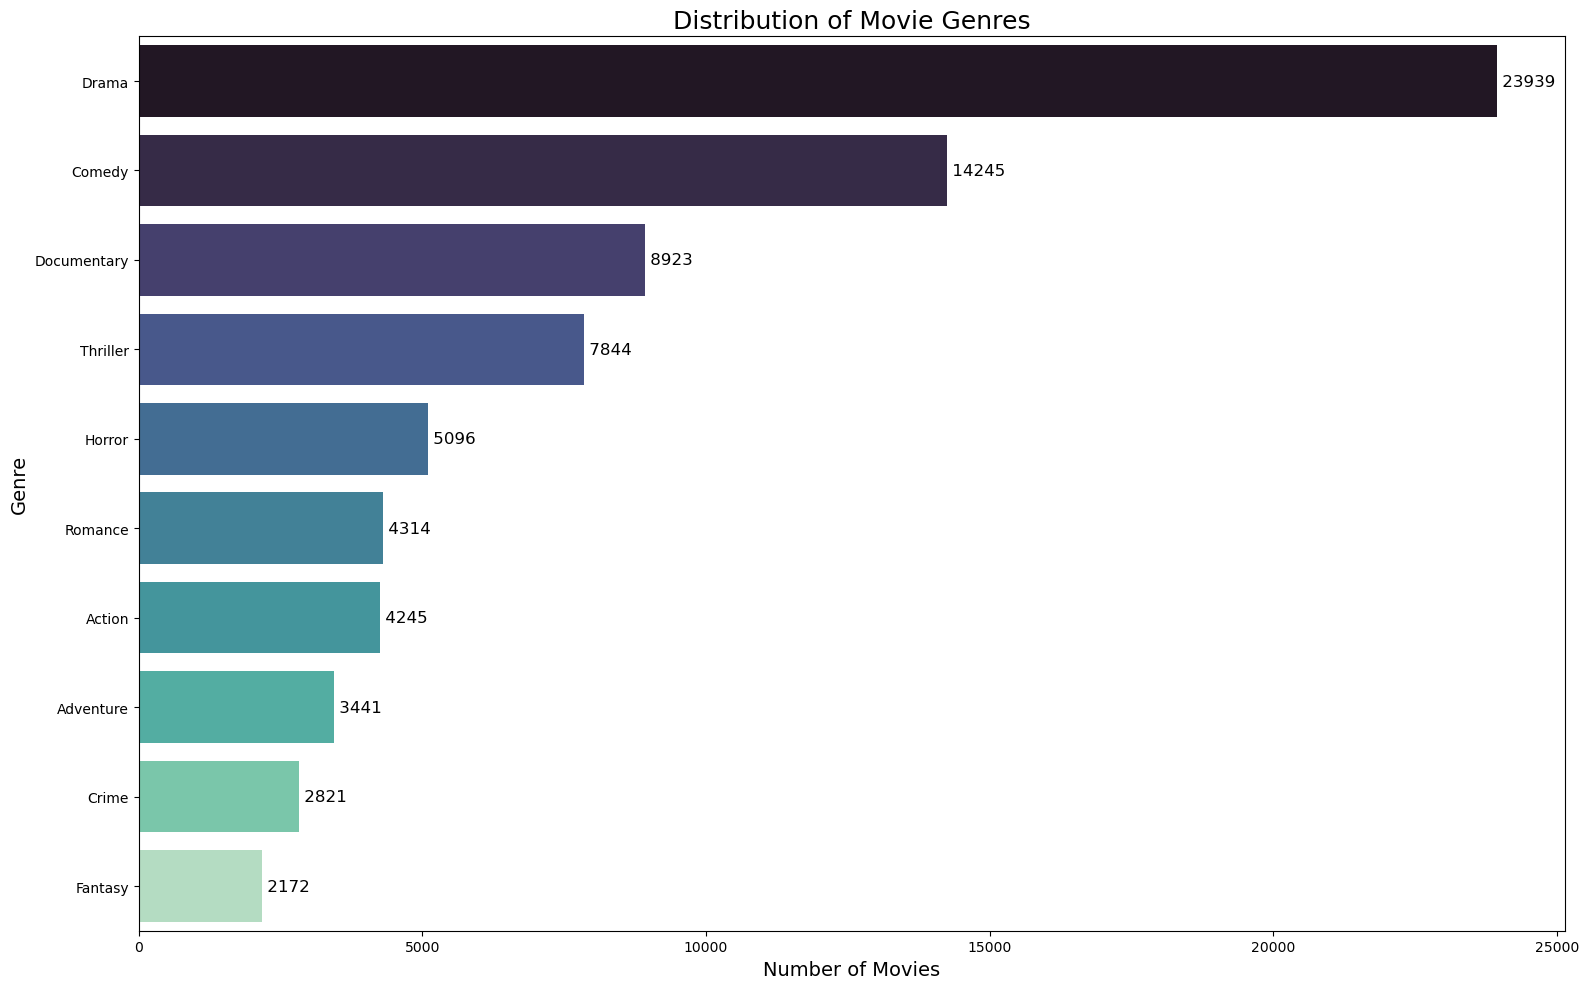

In [306]:
movies_filtered = movies_exploded[movies_exploded['genre'] != 'Unknown']

genre_counts = movies_filtered['genre'].value_counts().nlargest(10)

plt.figure(figsize=(16, 10))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='mako')

for i, value in enumerate(genre_counts.values):
    plt.text(value, i, f' {value}', va='center', fontsize=12, color='black')

plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Distribution of Movie Genres', fontsize=18)
plt.tight_layout()
plt.show()

#### Distribution of Movie Runtime (Histogram)

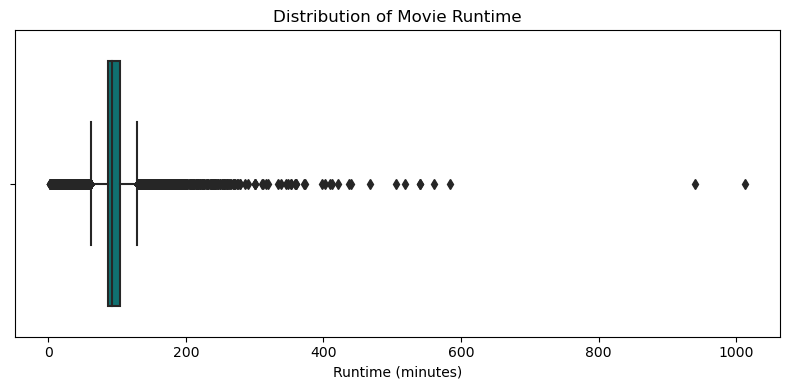

In [308]:
# Create boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=movies_final['runtimeMinutes'], color='teal')
plt.xlabel('Runtime (minutes)')
plt.title('Distribution of Movie Runtime')
plt.tight_layout()
plt.show()

In [309]:
# Filtering movies longer than 400 minutes
long_movies = movies_final[movies_final['runtimeMinutes'] > 400]

long_movies

,id,title,audienceScore,tomatoMeter,runtimeMinutes,originalLanguage,director,writer,release_year,genre,emotions,title_normalized,count,dominant_emotion
12901,dead_souls_2018,Dead Souls,55.67,100.00,506.0,Unknown,Unknown,Unknown,Unknown,"[Documentary, History]","[(remorse, 38.91844126424277), (fear, 31.09839...",dead souls,22,remorse
13079,death-in-the-land-of-encantos,Death in the Land of Encantos,55.67,65.76,540.0,English,Lav Diaz,Lav Diaz,Unknown,[Drama],"[(approval, 68.1592), (realization, 17.73), (a...",death in the land of encantos,1,approval
20968,heimat,Heimat,97.00,65.76,940.0,German,Edgar Reitz,Unknown,2010,[Drama],"[(admiration, 48.94738222668224), (approval, 3...",heimat,3,admiration
21572,hitler_a_film_from_germany,Hitler: A Film From Germany,89.00,80.00,437.0,German,Hans-Jürgen Syberberg,Unknown,Unknown,[Documentary],"[(excitement, 42.60415559858704), (admiration,...",hitler a film from germany,5,excitement
26537,1197007-la_roue,La Roue,76.00,80.00,412.0,Unknown,"Abel Gance,Blaise Cendrars",Abel Gance,Unknown,[Drama],"[(sadness, 43.47236911686939), (admiration, 42...",la roue,4,sadness
27407,les_vampires,Les Vampires,81.00,96.00,421.0,Unknown,Louis Feuillade,Unknown,Unknown,"[Crime, Drama]","[(admiration, 41.70306548990279), (confusion, ...",les vampires,21,admiration
34251,oj_made_in_america,O.J.: Made in America,98.00,100.00,467.0,Unknown,Ezra Edelman,Unknown,2016,"[Biography, Documentary]","[(amusement, 41.07396219835961), (admiration, ...",oj made in america,54,amusement
38163,red_wine_and_rain,Red Wine and Rain,55.67,65.76,1013.0,English,Jennifer Marie Morgan,Alexis Camins,Unknown,[Drama],"[(admiration, 86.19529999999999), (approval, 1...",red wine and rain,1,admiration
41250,shoah,Shoah,97.00,100.00,561.0,German,Claude Lanzmann,Claude Lanzmann,1985,[Documentary],"[(admiration, 39.94684918298521), (anger, 30.8...",shoah,33,admiration
43233,star_spangled_to_death,Star Spangled to Death,55.67,65.76,402.0,English,Ken Jacobs,Ken Jacobs,Unknown,[Documentary],"[(admiration, 74.4519), (approval, 24.6149), (...",star spangled to death,1,admiration


In [310]:
len(long_movies)

15

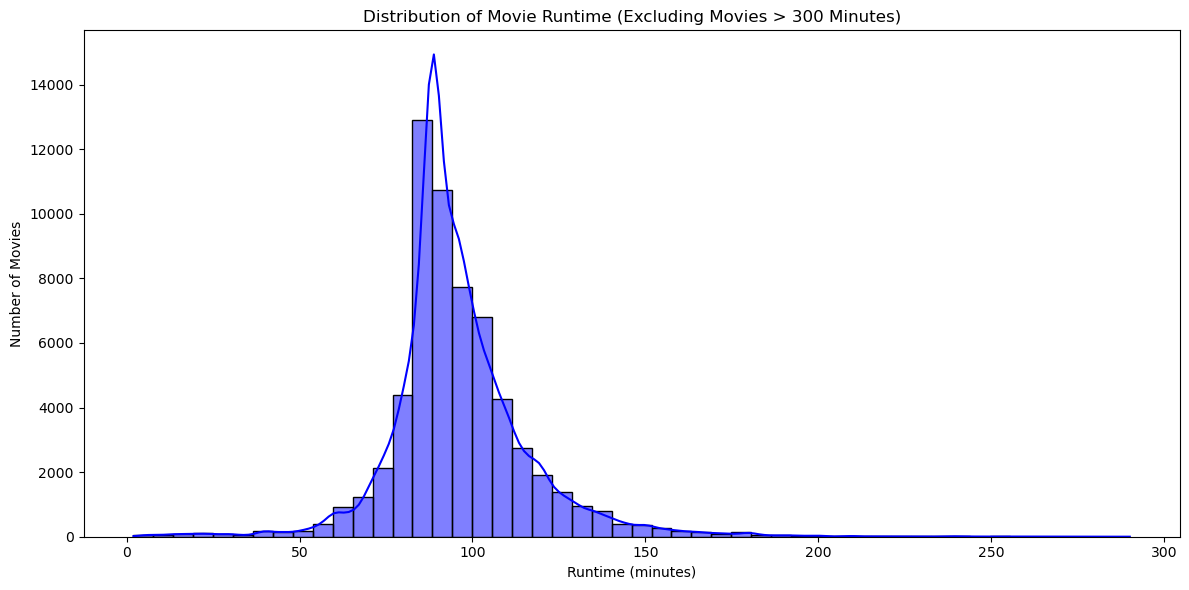

In [311]:
# Filter out long movies and recreate histogram

movies_shorter = movies_final[movies_final['runtimeMinutes'] < 300]

plt.figure(figsize=(12, 6))
sns.histplot(movies_shorter['runtimeMinutes'], bins=50, kde=True, color='blue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Runtime (Excluding Movies > 300 Minutes)')
plt.tight_layout()
plt.show()

#### Top 10 Publication Names (Bar chart)

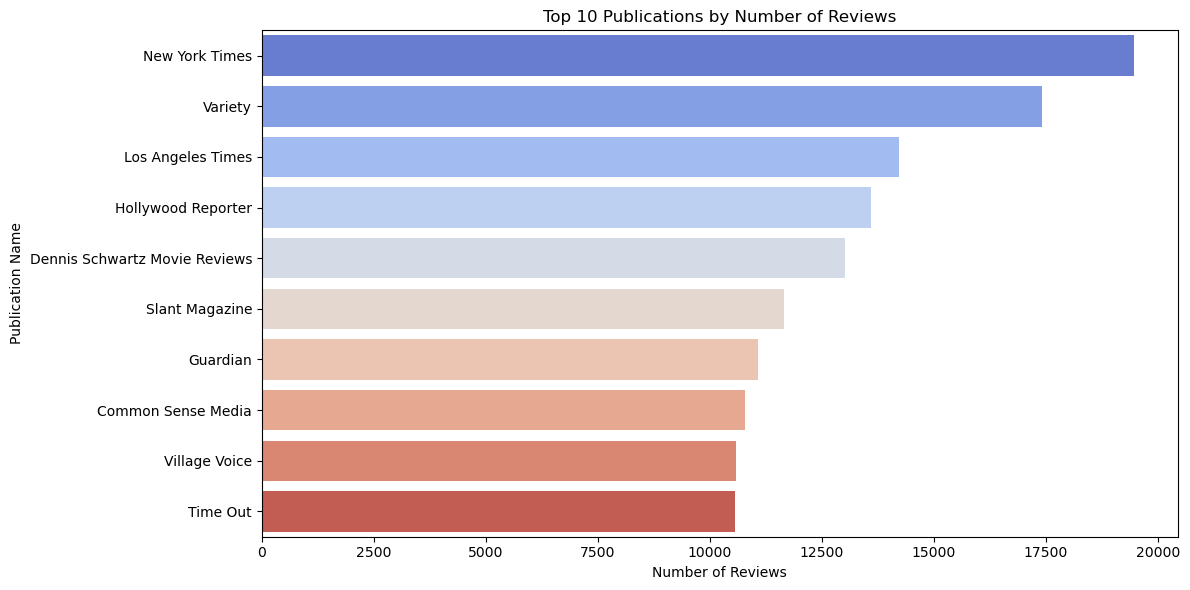

In [312]:
plt.figure(figsize=(12, 6))
top_publications = reviews_emotions['publicatioName'].value_counts().head(10)
sns.barplot(y=top_publications.index, x=top_publications.values, palette='coolwarm')
plt.xlabel('Number of Reviews')
plt.ylabel('Publication Name')
plt.title('Top 10 Publications by Number of Reviews')
plt.tight_layout()
plt.show()

#### Distribution of Movie Languages (Pie chart)

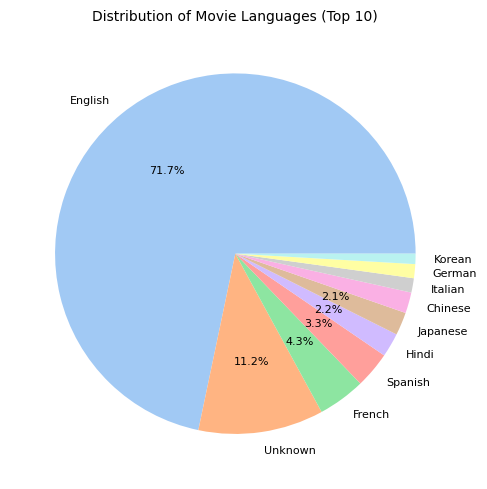

In [133]:
language_counts = movies_final['originalLanguage'].value_counts().head(10)

def autopct_format(value):
    return f'{value:.1f}%' if value > 2 else ''  # Displays percentages if > 2%

plt.figure(figsize=(5, 5))
wedges, labels, autotexts = plt.pie(
    language_counts, 
    labels=language_counts.index, 
    autopct=autopct_format, 
    colors=sns.color_palette('pastel'),
    textprops={'fontsize': 8},  
)

for autotext in autotexts:
    autotext.set_fontsize(8)  

plt.title('Distribution of Movie Languages (Top 10)', fontsize=10)
plt.tight_layout()
plt.show()

#### Review State Distribution (Pie chart)

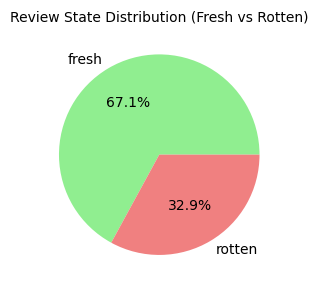

In [319]:
state_counts = reviews_emotions['reviewState'].value_counts()
plt.figure(figsize=(3, 3))

for autotext in autotexts:
    autotext.set_fontsize(8)  
    
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
textprops={'fontsize': 8},  

plt.title('Review State Distribution (Fresh vs Rotten)', fontsize=10)
plt.tight_layout()
plt.show()

#### Number of Movies per Release Year

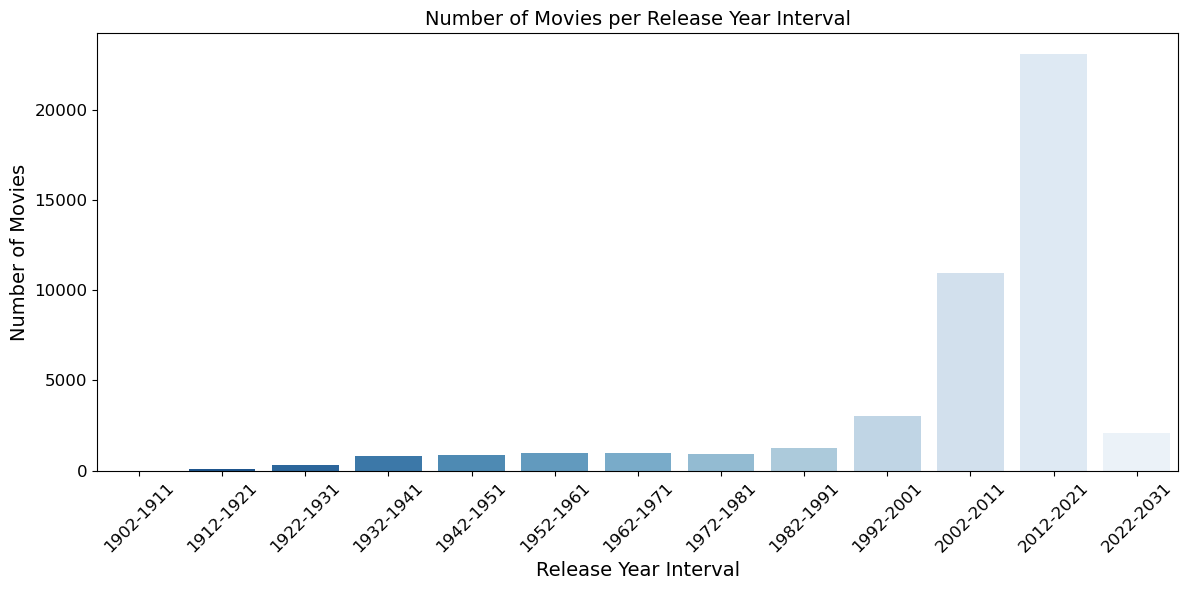

In [322]:
# Remove 'Unknown' values from 'release_year' and convert to numeric
movies_final_clean = movies_final[movies_final['release_year'] != 'Unknown'].copy()
movies_final_clean['release_year'] = pd.to_numeric(movies_final_clean['release_year'])

# Define bins (e.g., decades)
bins = range(int(movies_final_clean['release_year'].min()), 
             int(movies_final_clean['release_year'].max()) + 10, 10)
labels = [f'{b}-{b+9}' for b in bins[:-1]]

# Categorize years into bins
movies_final_clean['year_bin'] = pd.cut(movies_final_clean['release_year'], bins=bins, labels=labels, right=False)

# Count number of movies per bin
year_bin_counts = movies_final_clean['year_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=year_bin_counts.index, y=year_bin_counts.values, palette='Blues_r')

plt.xlabel('Release Year Interval', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Number of Movies per Release Year Interval', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Top 10 Directors by Number of Movies

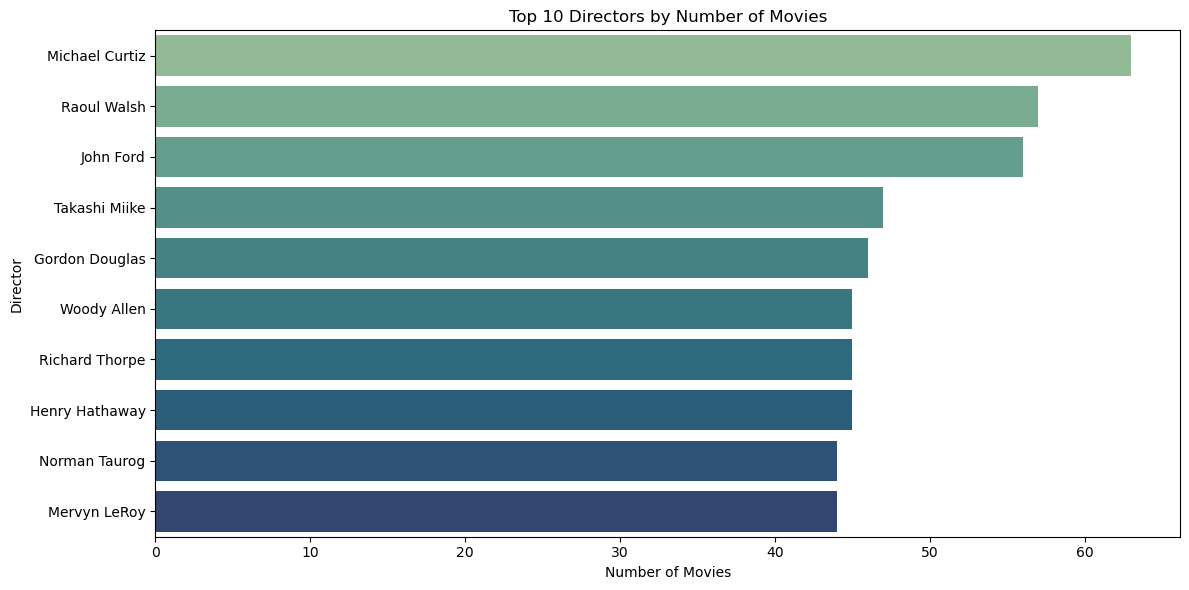

In [325]:
movies_final = movies_final[movies_final['director'] != 'Unknown']
top_directors = movies_final['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette='crest')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Movies')
plt.tight_layout()
plt.show()

#### Average Runtime Minutes per Genre (Bar chart)

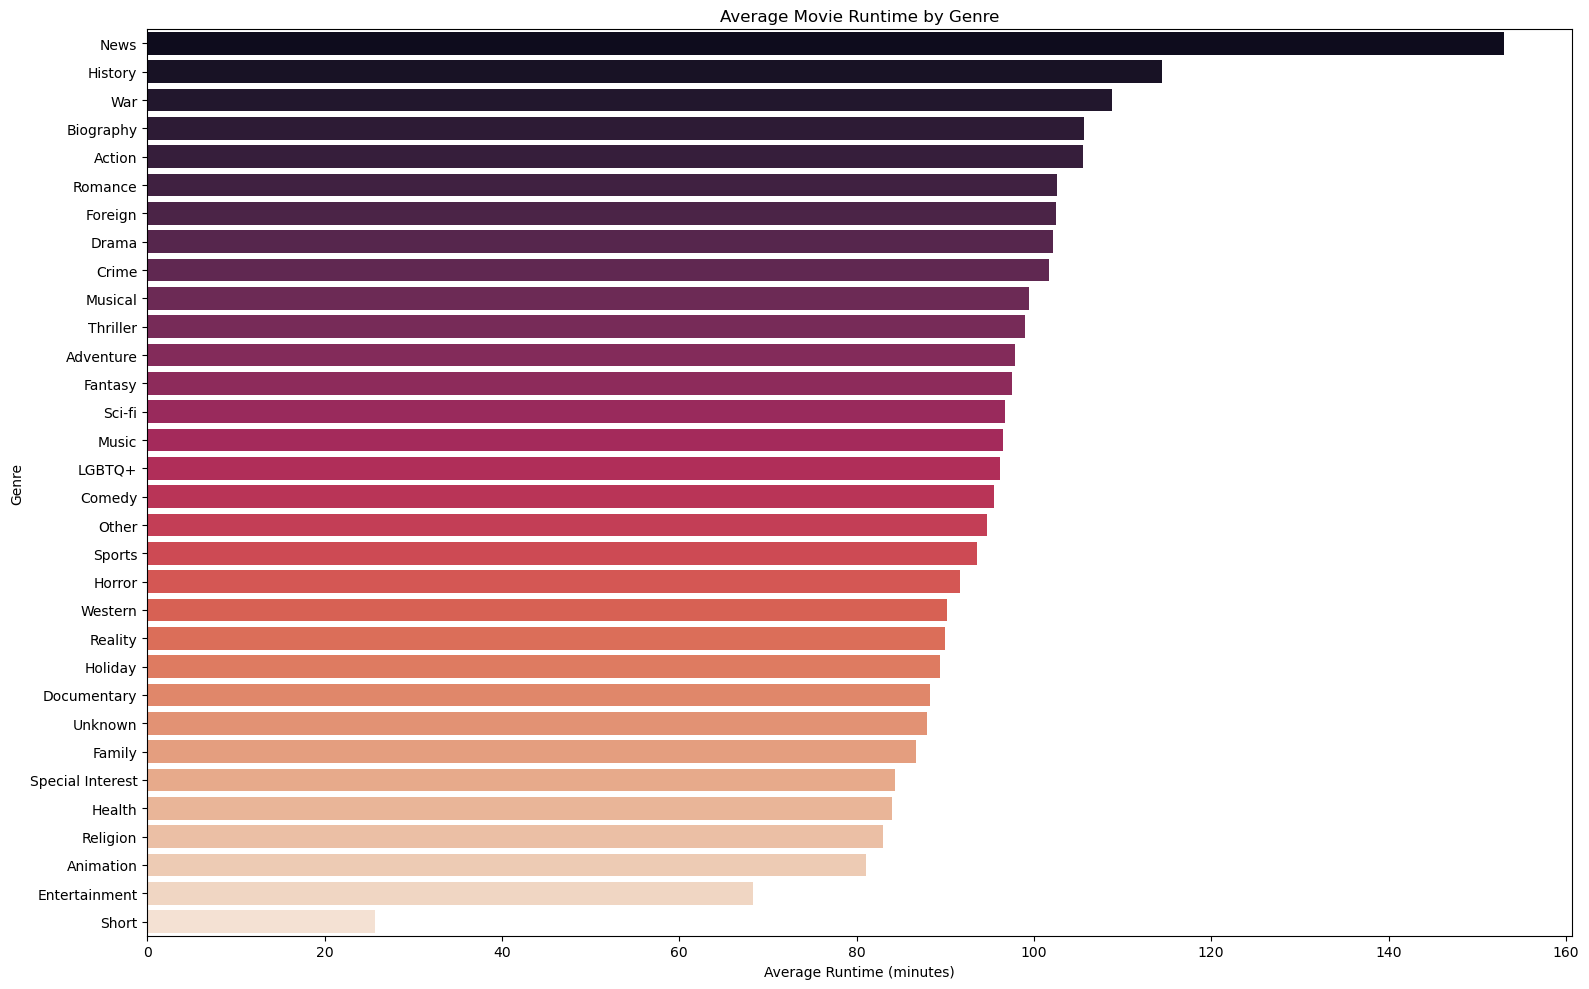

In [324]:
runtime_genre = movies_exploded.groupby('genre')['runtimeMinutes'].mean().sort_values(ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(y=runtime_genre.index, x=runtime_genre.values, palette='rocket')
plt.xlabel('Average Runtime (minutes)')
plt.ylabel('Genre')
plt.title('Average Movie Runtime by Genre')
plt.tight_layout()
plt.show()

#### Distribution of Emotions by Genre (Stacked Bar chart)

In [332]:
movies_exploded.head()

,id,title,audienceScore,tomatoMeter,runtimeMinutes,originalLanguage,director,writer,release_year,genre,emotions,title_normalized,count,dominant_emotion
0,my_missing_valentine,消失的情人節,55.67,65.76,119.0,Chinese,Yu-Hsun Chen,"Yu-Hsun Chen,Yu-Hsun Chen",Unknown,Comedy,"[(admiration, 52.16256606223262), (excitement,...",NaN,3,admiration
0,my_missing_valentine,消失的情人節,55.67,65.76,119.0,Chinese,Yu-Hsun Chen,"Yu-Hsun Chen,Yu-Hsun Chen",Unknown,Drama,"[(admiration, 52.16256606223262), (excitement,...",NaN,3,admiration
0,my_missing_valentine,消失的情人節,55.67,65.76,119.0,Chinese,Yu-Hsun Chen,"Yu-Hsun Chen,Yu-Hsun Chen",Unknown,Fantasy,"[(admiration, 52.16256606223262), (excitement,...",NaN,3,admiration
0,my_missing_valentine,消失的情人節,55.67,65.76,119.0,Chinese,Yu-Hsun Chen,"Yu-Hsun Chen,Yu-Hsun Chen",Unknown,Foreign,"[(admiration, 52.16256606223262), (excitement,...",NaN,3,admiration
0,my_missing_valentine,消失的情人節,55.67,65.76,119.0,Chinese,Yu-Hsun Chen,"Yu-Hsun Chen,Yu-Hsun Chen",Unknown,Romance,"[(admiration, 52.16256606223262), (excitement,...",NaN,3,admiration


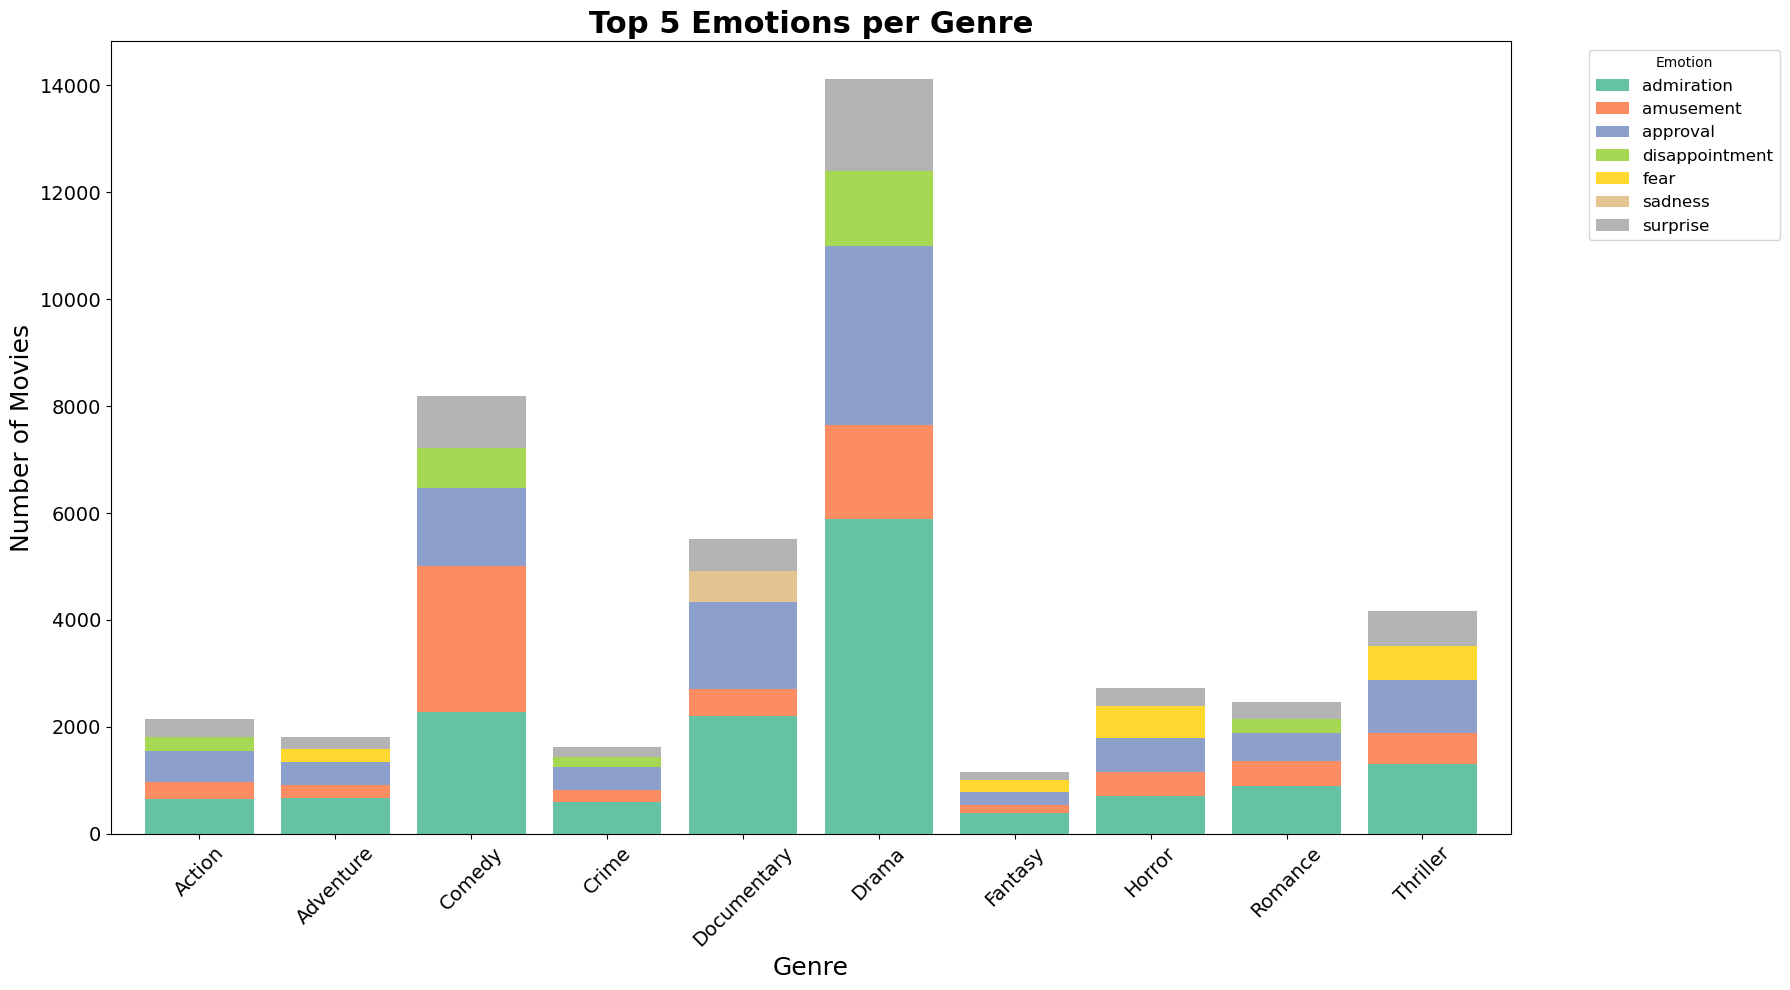

In [336]:
# Remove rows where the genre is "Unknown"
movies_exploded = movies_exploded[movies_exploded['genre'] != 'Unknown']

# Count genre frequencies and select top 10 genres
top_10_genres = movies_exploded['genre'].value_counts().nlargest(10).index

# Filter movies to include only the top 10 genres
movies_top_genres = movies_exploded[movies_exploded['genre'].isin(top_10_genres)].copy()

# Get top 5 emotions by genre
top_emotions_per_genre = movies_top_genres.groupby(['genre', 'dominant_emotion']).size().reset_index(name='count')
top_emotions_per_genre = top_emotions_per_genre.groupby('genre').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Pivot the data for a stacked bar chart
emotions_pivot = top_emotions_per_genre.pivot(index='genre', columns='dominant_emotion', values='count').fillna(0)

# Plot stacked bar chart with each genre as a separate bar
ax = emotions_pivot.plot(kind='bar', stacked=True, figsize=(18, 10), colormap='Set2', width=0.8)

plt.xlabel('Genre', fontsize=18)  
plt.ylabel('Number of Movies', fontsize=18)  
plt.title('Top 5 Emotions per Genre', fontsize=22, weight='bold') 
plt.xticks(rotation=45, fontsize=14) 
plt.yticks(fontsize=14)  
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

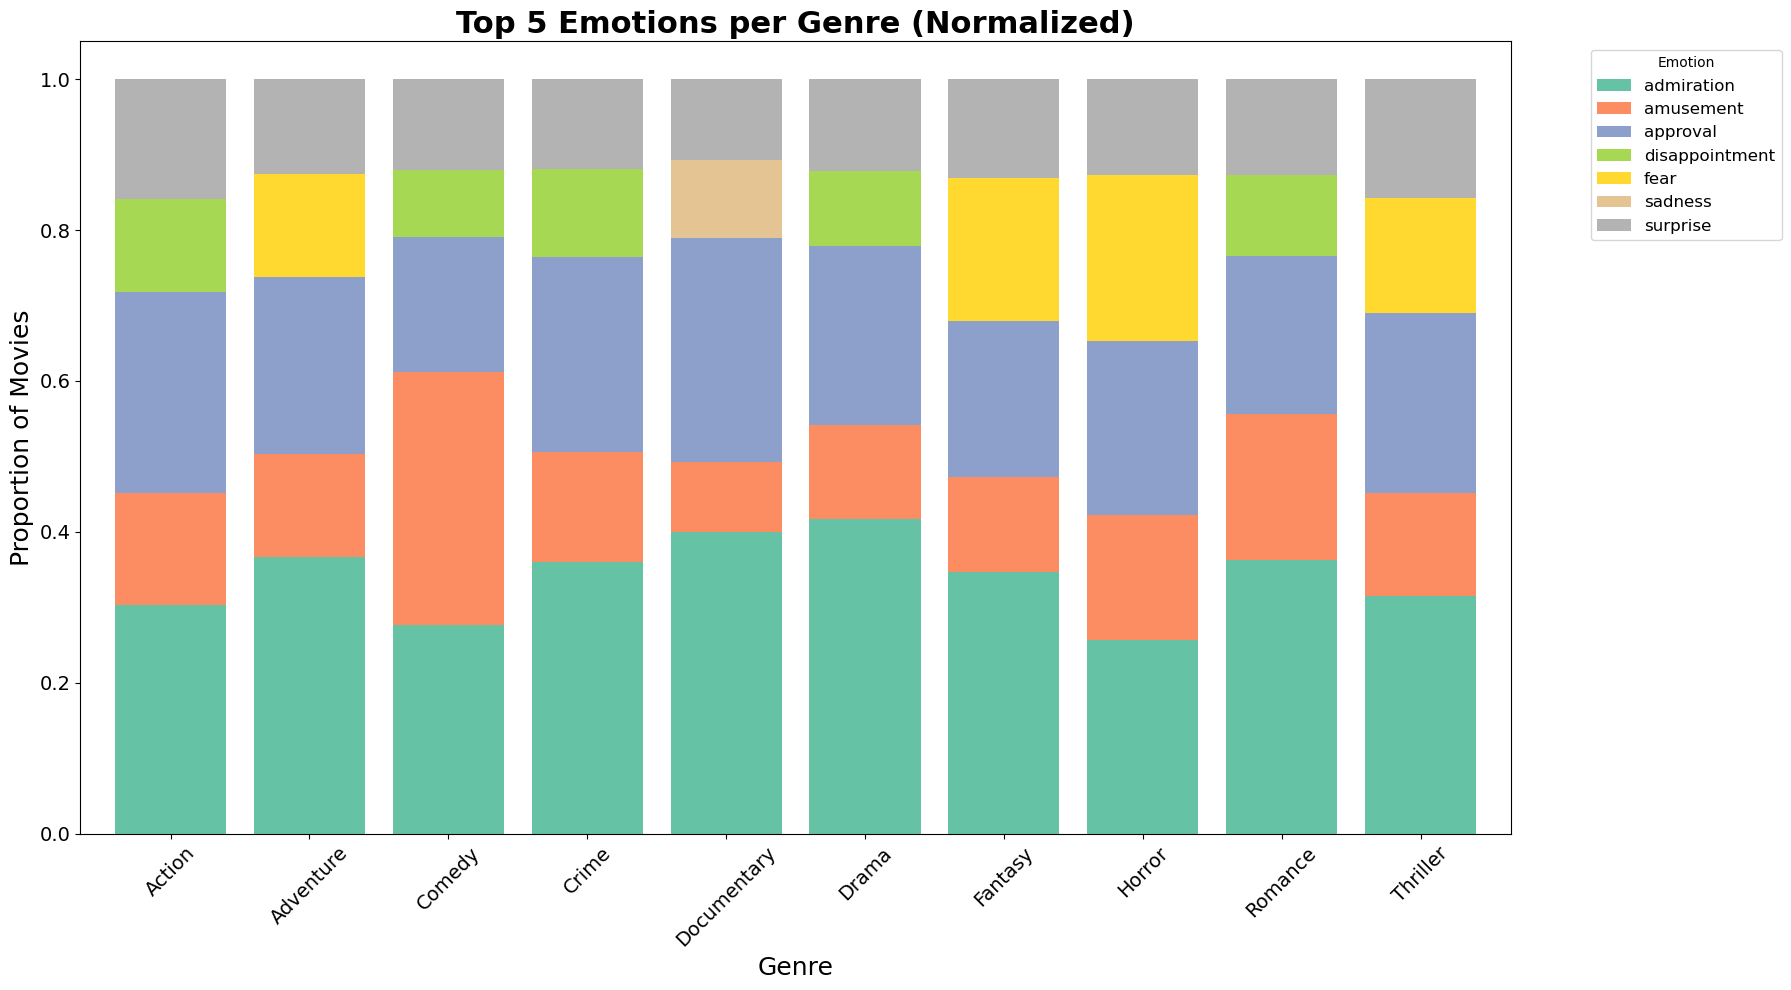

In [337]:
# Remove rows where the genre is "Unknown"
movies_exploded = movies_exploded[movies_exploded['genre'] != 'Unknown']

# Count genre frequencies and select top 10 genres
top_10_genres = movies_exploded['genre'].value_counts().nlargest(10).index

# Filter movies to include only the top 10 genres
movies_top_genres = movies_exploded[movies_exploded['genre'].isin(top_10_genres)].copy()

# Get top 5 emotions by genre
top_emotions_per_genre = movies_top_genres.groupby(['genre', 'dominant_emotion']).size().reset_index(name='count')
top_emotions_per_genre = top_emotions_per_genre.groupby('genre').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Normalize the counts to proportions within each genre
top_emotions_per_genre['proportion'] = top_emotions_per_genre.groupby('genre')['count'].transform(lambda x: x / x.sum())

# Pivot the data for a stacked bar chart
emotions_pivot = top_emotions_per_genre.pivot(index='genre', columns='dominant_emotion', values='proportion').fillna(0)

# Plot stacked bar chart with normalized proportions
ax = emotions_pivot.plot(kind='bar', stacked=True, figsize=(18, 10), colormap='Set2', width=0.8)

plt.xlabel('Genre', fontsize=18)
plt.ylabel('Proportion of Movies', fontsize=18)
plt.title('Top 5 Emotions per Genre (Normalized)', fontsize=22, weight='bold')
plt.xticks(rotation=45, fontsize=14) 
plt.yticks(fontsize=14)  
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

#### Distribution of Emotions by Review State (Stacked Bar chart)

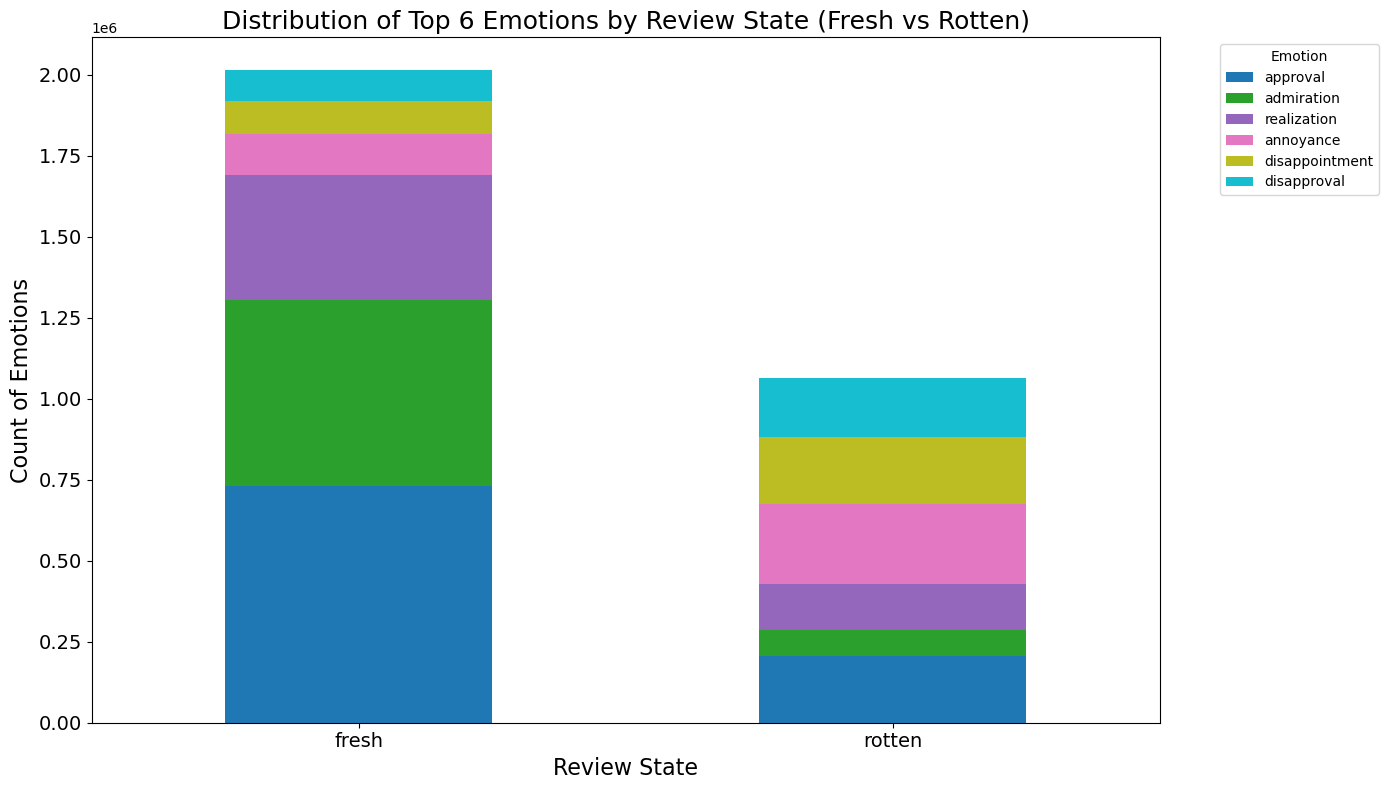

In [326]:
# Explode predicted moods to individual rows
reviews_exploded = reviews_emotions.explode('predicted_moods')
reviews_exploded[['emotion', 'probability']] = pd.DataFrame(reviews_exploded['predicted_moods'].tolist(), index=reviews_exploded.index)

# Select top 10 emotions
emotion_counts = reviews_exploded['emotion'].value_counts().head(6)
top_emotions_list = emotion_counts.index.tolist()

# Filter reviews_exploded to only top 10 emotions
reviews_top_emotions = reviews_exploded[reviews_exploded['emotion'].isin(top_emotions_list)]

# Pivot table for visualization
emotion_state_pivot = reviews_top_emotions.groupby(['reviewState', 'emotion']).size().unstack().fillna(0)

# Plot stacked bar chart
emotion_state_pivot = emotion_state_pivot[top_emotions_list]  # Ensure consistent emotion order
emotion_state_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')

plt.xlabel('Review State', fontsize=16)
plt.ylabel('Count of Emotions', fontsize=16)
plt.title('Distribution of Top 6 Emotions by Review State (Fresh vs Rotten)', fontsize=18)
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()